## <b>Project Description:</b>


Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
### Problem Statement: 
    a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

    b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

Dataset Description:
Number of columns: 23


    Date  - The date of observation
    Location  -The common name of the location of the weather station
    MinTemp  -The minimum temperature in degrees celsius
    MaxTemp -The maximum temperature in degrees celsius
    Rainfall  -The amount of rainfall recorded for the day in mm
    Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
    Sunshine  -The number of hours of bright sunshine in the day.
    WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
    WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
    WindDir9am -Direction of the wind at 9am
    WindDir3pm -Direction of the wind at 3pm
    WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
    WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
    Humidity9am -Humidity (percent) at 9am
    Humidity3pm -Humidity (percent) at 3pm
    Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
    Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
    Cloud9am - Fraction of sky obscured by cloud at 9am. 
    Cloud3pm -Fraction of sky obscured by cloud 
    Temp9am-Temperature (degrees C) at 9am
    Temp3pm -Temperature (degrees C) at 3pm
    RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
    RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

Dataset Link-  
•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
•	https://github.com/dsrscientist/dataset3


In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 8425
No of Columns: 23


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], object: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

#### Observation :
- All variable are Numerical in nature.
- RainToday and RainTomorrow are Target Variable.
- This dataset contain 8425 Rows and 23 Columns.

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.drop(['Date'], axis = 1,inplace=True) 
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [6]:
df.shape

(8425, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

In [8]:
categorical_col, contin_val=[],[]

for i in df.columns:
    
    if df[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)
        
print(categorical_col)
print(contin_val)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


In [9]:
df.nunique()

Location          12
MinTemp          285
MaxTemp          331
Rainfall         250
Evaporation      116
Sunshine         140
WindGustDir       16
WindGustSpeed     52
WindDir9am        16
WindDir3pm        16
WindSpeed9am      34
WindSpeed3pm      35
Humidity9am       90
Humidity3pm       94
Pressure9am      384
Pressure3pm      374
Cloud9am           9
Cloud3pm           9
Temp9am          304
Temp3pm          328
RainToday          2
RainTomorrow       2
year              10
month             12
day               31
dtype: int64

In [10]:
#Check for Null values
df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
year                0
month               0
day                 0
dtype: int64

In [11]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5


In [12]:
#percentage of missing data in every column

(df.isnull().sum()/len(df))*100

Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
year              0.000000
month             0.000000
day               0.000000
dtype: float64

In [13]:
#Fill the missing values for continuous variables with mean
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [14]:
#Fill the missing values for continuous variables with mode

df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [15]:
#Fill the missing values for continuous variables with mode
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [16]:
#Check percentage of missing data in every column

(df.isnull().sum()/len(df))*100

Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
year             0.0
month            0.0
day              0.0
dtype: float64

0.0    6435
1.0    1990
Name: RainToday, dtype: int64
0.0    6434
1.0    1991
Name: RainTomorrow, dtype: int64


<AxesSubplot: xlabel='RainTomorrow', ylabel='count'>

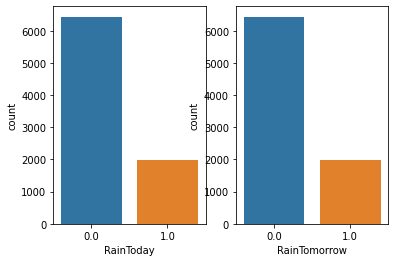

<Figure size 1440x1440 with 0 Axes>

In [17]:
fig, ax =plt.subplots(1,2)
print(df.RainToday.value_counts())
print(df.RainTomorrow.value_counts())

plt.figure(figsize=(20,20))
sns.countplot(data=df,x='RainToday',ax=ax[0])
sns.countplot(data=df,x='RainTomorrow',ax=ax[1])

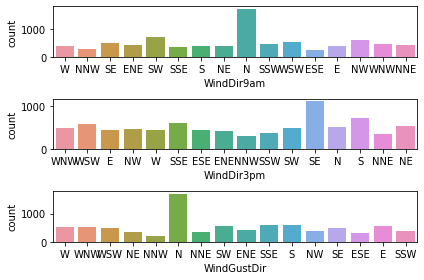

<Figure size 720x720 with 0 Axes>

In [18]:
fig, ax =plt.subplots(3,1)
plt.figure(figsize=(10,10))

sns.countplot(data=df,x='WindDir9am',ax=ax[0])
sns.countplot(data=df,x='WindDir3pm',ax=ax[1])
sns.countplot(data=df,x='WindGustDir',ax=ax[2])
fig.tight_layout()


### Observation
At 9 am, it is highest for direction N.

At 3 pm, it is highest for direction SE.

In [19]:
#Encoding the categorical variables
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])

In [20]:
df.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,13.4,13.4,0.6,5.389395,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0,2008,12,1
1,1,7.4,7.4,0.0,5.389395,7.632205,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0,2008,12,2
2,1,12.9,12.9,0.0,5.389395,7.632205,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0,2008,12,3
3,1,9.2,9.2,0.0,5.389395,7.632205,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0,2008,12,4
4,1,17.5,17.5,1.0,5.389395,7.632205,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,2008,12,5


In [21]:
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
Location,1.000000,0.116531,0.116531,0.007693,0.143519,0.057817,-0.035408,0.231396,-0.027103,-0.027736,0.221378,0.231801,0.005662,0.055790,-0.032261,-0.020574,0.038019,0.017561,0.118051,0.060570,0.003071,0.002824,0.486405,-0.082407,-0.002019
MinTemp,0.116531,1.000000,1.000000,0.087684,0.254965,0.056184,-0.145316,0.230058,-0.041650,-0.147166,0.136872,0.178349,-0.130731,0.079048,-0.429432,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942,0.044123,-0.245854,0.009446
MaxTemp,0.116531,1.000000,1.000000,0.087684,0.254965,0.056184,-0.145316,0.230058,-0.041650,-0.147166,0.136872,0.178349,-0.130731,0.079048,-0.429432,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942,0.044123,-0.245854,0.009446
Rainfall,0.007693,0.087684,0.087684,1.000000,0.023517,-0.169432,0.038812,0.086000,0.093821,0.038560,0.050631,0.024791,0.228800,0.235444,-0.072668,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.461106,0.220021,0.006435,-0.012244,-0.013760
Evaporation,0.143519,0.254965,0.254965,0.023517,1.000000,0.226001,-0.078765,0.136371,-0.061677,-0.047952,0.104294,0.101126,-0.213108,-0.161661,-0.177786,-0.189558,-0.062283,-0.108022,0.305264,0.315109,-0.088654,-0.059012,0.152708,0.004362,0.013597
Sunshine,0.057817,0.056184,0.056184,-0.169432,0.226001,1.000000,-0.105918,-0.013778,-0.076560,-0.068553,-0.018069,0.030145,-0.360831,-0.440268,0.021887,-0.035863,-0.533391,-0.547304,0.250640,0.395324,-0.234230,-0.327731,0.065374,-0.006694,0.004662
WindGustDir,-0.035408,-0.145316,-0.145316,0.038812,-0.078765,-0.105918,1.000000,0.016591,0.403562,0.505799,0.025399,0.094623,0.036467,0.053567,-0.109704,-0.024997,0.123883,0.092979,-0.176318,-0.238856,0.125188,0.051832,-0.088340,0.034823,0.015683
WindGustSpeed,0.231396,0.230058,0.230058,0.086000,0.136371,-0.013778,0.016591,1.000000,-0.072058,0.071235,0.600198,0.634939,-0.269593,-0.091860,-0.407139,-0.372651,0.023313,0.078631,0.202298,0.102199,0.076822,0.190127,-0.042402,0.051968,-0.002876
WindDir9am,-0.027103,-0.041650,-0.041650,0.093821,-0.061677,-0.076560,0.403562,-0.072058,1.000000,0.249527,0.054272,0.047116,0.025604,0.124556,-0.011024,0.073446,0.099582,0.062947,-0.103111,-0.221634,0.157324,0.032860,-0.014498,0.012544,-0.015154
WindDir3pm,-0.027736,-0.147166,-0.147166,0.038560,-0.047952,-0.068553,0.505799,0.071235,0.249527,1.000000,0.025973,0.068799,-0.010312,-0.012167,-0.136517,-0.043681,0.075453,0.053986,-0.165072,-0.194463,0.100125,0.008918,-0.005812,0.029384,0.003089


MinTemp and Temp9am highly correlated.

MinTemp and Temp3pm highly correlated.

MaxTemp and Temp9am highly correlated.

MaxTemp and Temp3pm highly correlated.

Temp3pm and Temp9am highly correlated.

Humidity9am and Humidity3pm highly correlated.

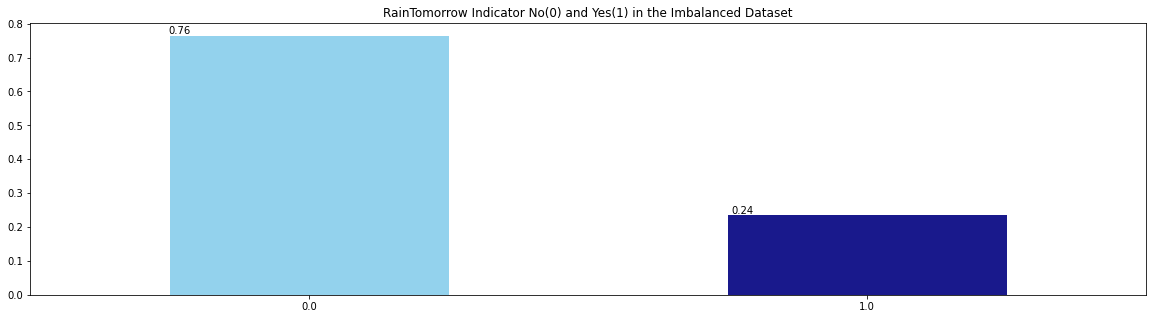

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,5))
ax=df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

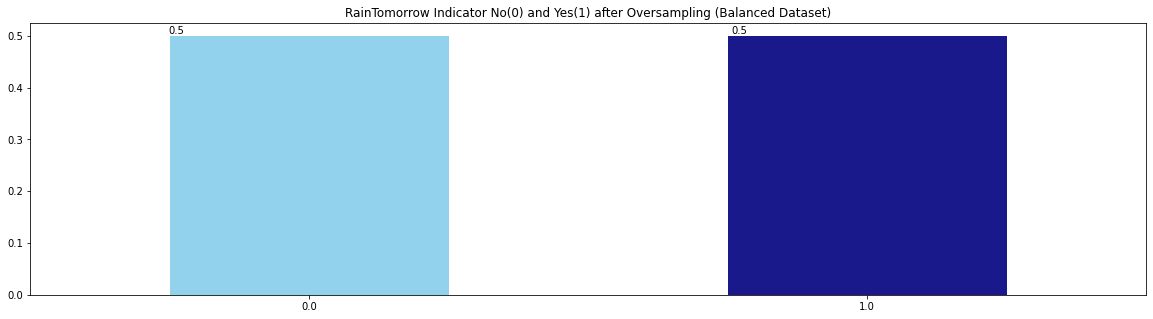

In [23]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (20,5))
ax=oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()


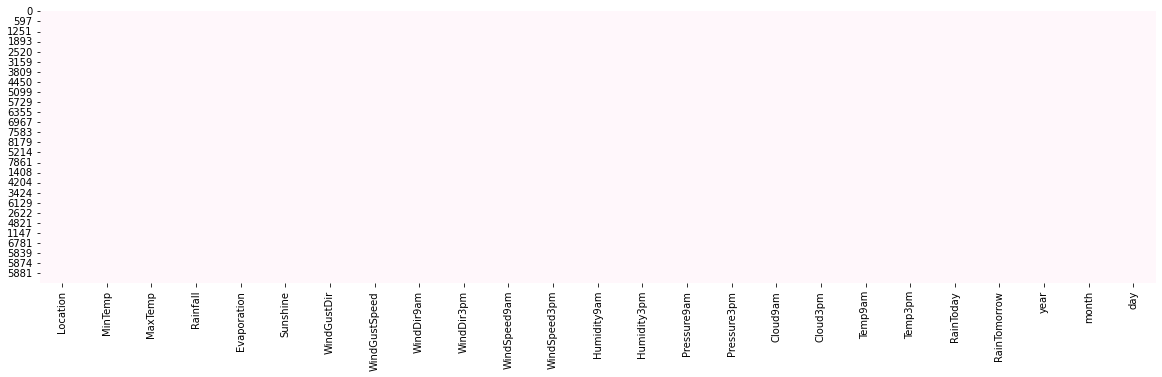

In [24]:
# Missing Data Pattern in Training Data
import seaborn as sns
plt.figure(figsize = (20,5))
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')
plt.show()

In [25]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Location,0,0.0
Humidity3pm,0,0.0
month,0,0.0
year,0,0.0
RainTomorrow,0,0.0


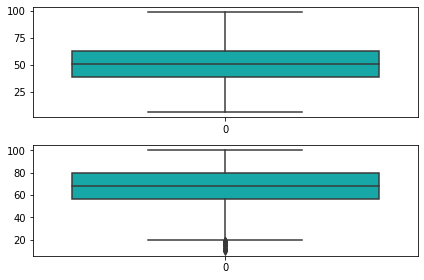

<Figure size 720x720 with 0 Axes>

In [26]:
fig, ax =plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.boxplot(df['Humidity3pm'],orient='v',color='c',ax=ax[0])
sns.boxplot(df['Humidity9am'],orient='v',color='c',ax=ax[1])
fig.tight_layout()

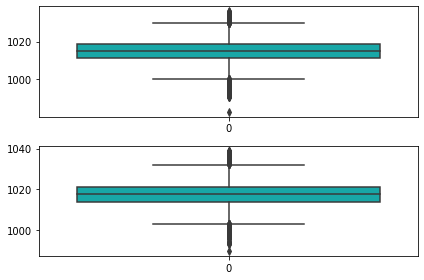

<Figure size 720x720 with 0 Axes>

In [27]:
fig, ax =plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.boxplot(df['Pressure3pm'],orient='v',color='c',ax=ax[0])
sns.boxplot(df['Pressure9am'],orient='v',color='c',ax=ax[1])
fig.tight_layout()

# Bi Variate

<AxesSubplot: xlabel='RainToday', ylabel='MaxTemp'>

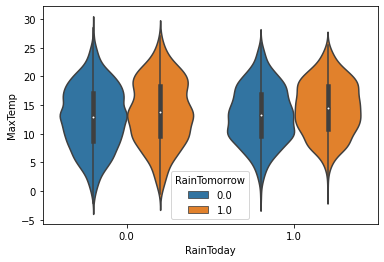

In [28]:
sns.violinplot(x='RainToday',y='MaxTemp',data=df,hue='RainTomorrow')

<AxesSubplot: xlabel='RainToday', ylabel='MinTemp'>

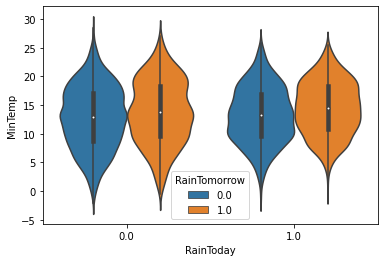

In [29]:
sns.violinplot(x='RainToday',y='MinTemp',data=df,hue='RainTomorrow')

# Removing the outliers

In [30]:
from scipy import stats
print('Shape of DataFrame Before Removing Outliers', df.shape )
df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', df.shape )

Shape of DataFrame Before Removing Outliers (8425, 25)
Shape of DataFrame After Removing Outliers (7987, 25)


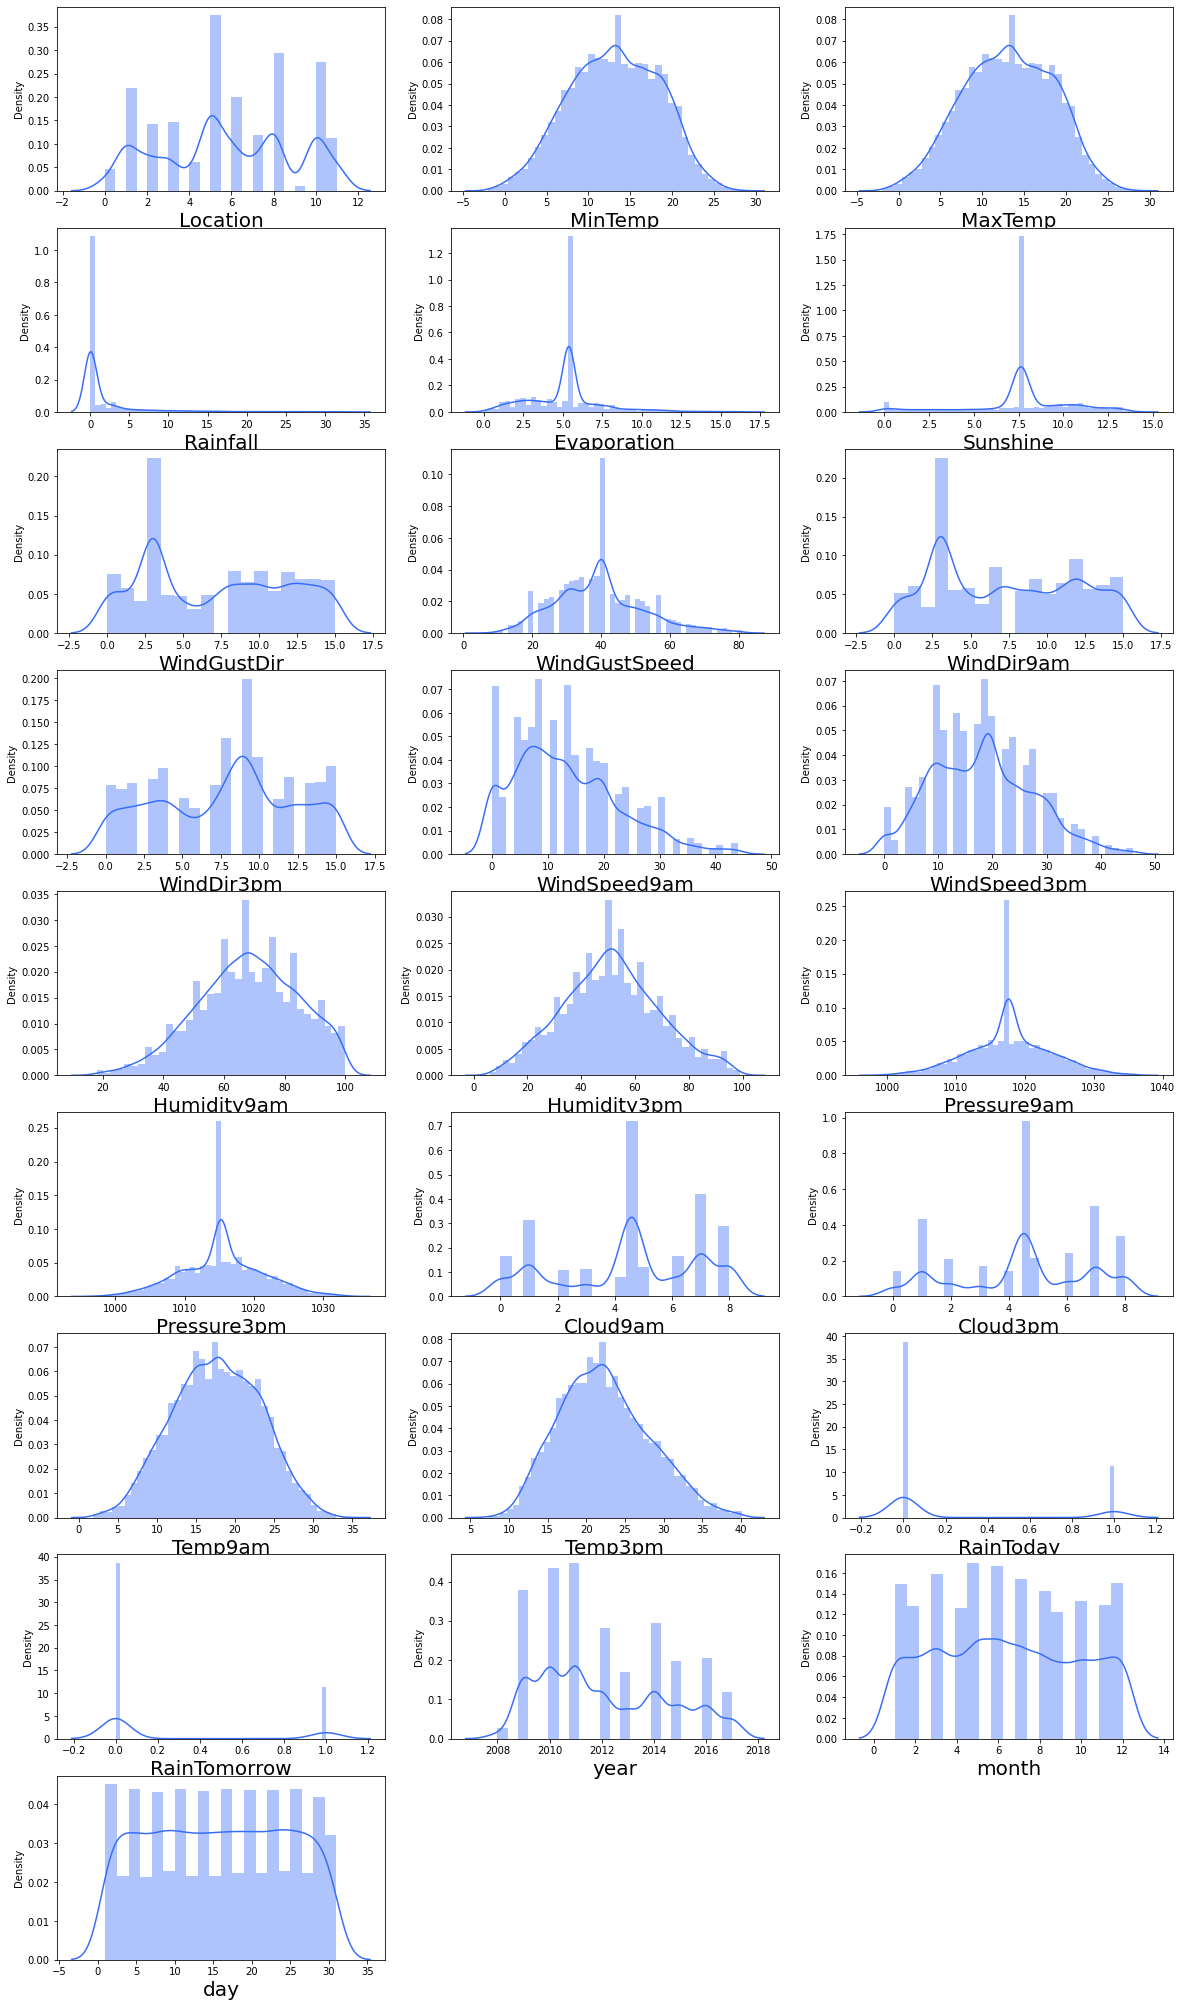

In [31]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month and categorical feature.

So we gone ignore skewness present in discrete numerical and categorical feature.

# Dropping highly correlated columns

In [32]:
df=df.drop(['Temp3pm','Temp9am','Humidity9am'],axis=1)
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow',
       'year', 'month', 'day'],
      dtype='object')

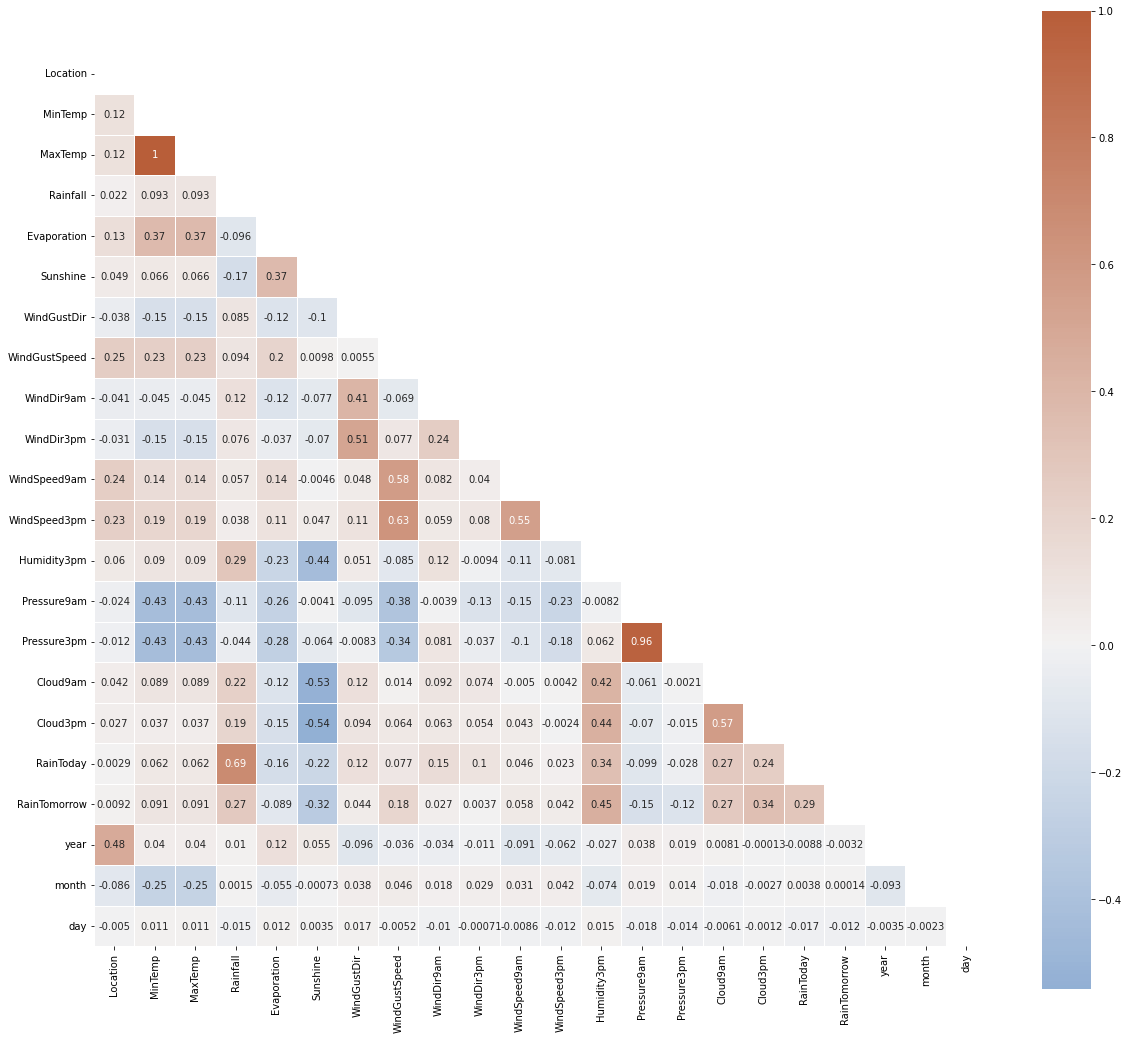

In [33]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

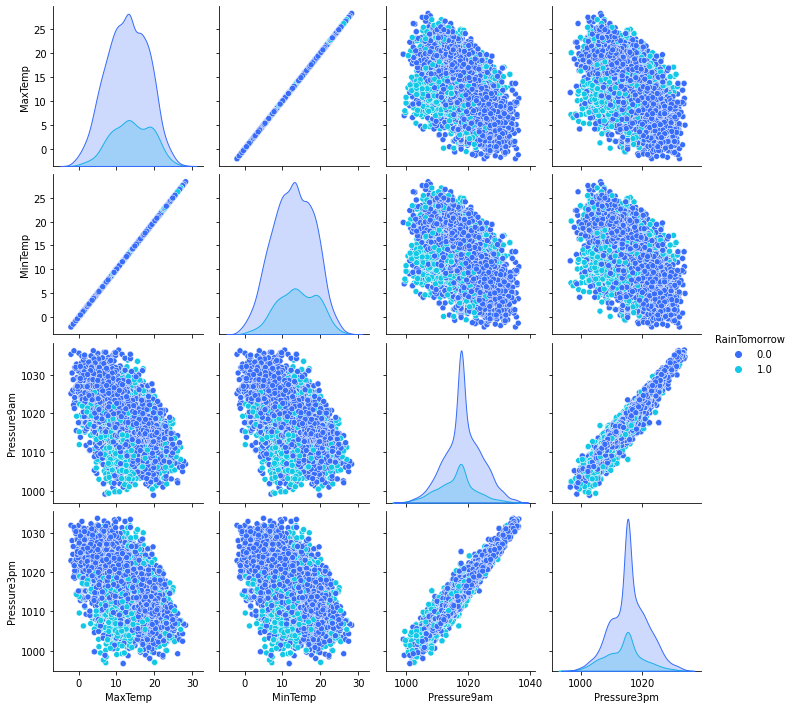

In [34]:
sns.pairplot( data=df, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm'), hue='RainTomorrow' )
plt.show()

In [35]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(df)
modified_data = pd.DataFrame(r_scaler.transform(df), index=df.index, columns=df.columns)

In [36]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')


In [37]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure3pm', 'Cloud3pm']
[0.02306984 0.04988613 0.04915623 0.06130795 0.0302049  0.05191578
 0.03022867 0.0577872  0.03180542 0.03387319 0.03795767 0.04185218
 0.17443373 0.04750675 0.04880991 0.03711696 0.06339937 0.02648545
 0.02584441 0.03194473 0.04541352]


In [38]:
features = df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',  
                       'RainToday']]
target = df['RainTomorrow']

In [39]:
features.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,1,13.4,13.4,0.6,5.389395,7.632205,13,44.0,13,14,20.0,24.0,22.0,1007.7,1007.1,8.000000,4.503183,0.0
1,1,7.4,7.4,0.0,5.389395,7.632205,14,44.0,6,15,4.0,22.0,25.0,1010.6,1007.8,4.566622,4.503183,0.0
2,1,12.9,12.9,0.0,5.389395,7.632205,15,46.0,13,15,19.0,26.0,30.0,1007.6,1008.7,4.566622,2.000000,0.0
3,1,9.2,9.2,0.0,5.389395,7.632205,4,24.0,9,0,11.0,9.0,16.0,1017.6,1012.8,4.566622,4.503183,0.0
4,1,17.5,17.5,1.0,5.389395,7.632205,13,41.0,1,7,7.0,20.0,33.0,1010.8,1006.0,7.000000,8.000000,0.0


In [40]:
# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=target)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Base Machine Learning Model-Logistic Regression
# Rain Forecast for tomorrow

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

lr=LogisticRegression()  

# Find best random state value where training accuracy = testing accuracy

Random_State=[]
Training_Accuracy=[]
Testing_Accuracy=[]
Difference=[]

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)

    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_Accuracy.append(accuracy_score(y_train,pred_train)*100)
        Testing_Accuracy.append(accuracy_score(y_test,pred_test)*100)
        Difference.append((accuracy_score(y_test,pred_test)*100)-(accuracy_score(y_train,pred_train)*100))

RS_table=pd.DataFrame({"Random State":Random_State,"Training Accuracy":Training_Accuracy,"Testing Accuracy":Testing_Accuracy,"Difference":Difference})
print("Data Frame random state values with training accuracy = testing accuracy")
RS_table.sort_values(by=["Difference"],ascending=True)

Data Frame random state values with training accuracy = testing accuracy


,Random State,Training Accuracy,Testing Accuracy,Difference
26,779,83.236813,83.166458,-0.070355
22,699,83.236813,83.166458,-0.070355
29,934,83.236813,83.166458,-0.070355
15,498,83.408984,83.354193,-0.054791
3,128,83.346377,83.291615,-0.054762
6,142,83.346377,83.291615,-0.054762
16,545,83.346377,83.291615,-0.054762
9,220,83.221161,83.166458,-0.054703
12,359,83.330725,83.291615,-0.039110
1,78,83.377680,83.354193,-0.023488


In [42]:
# Ideal random state where training accuracy == testing accuracy
RSN=RS_table["Random State"][RS_table["Difference"]==RS_table["Difference"].min()]
randomstate=np.array(RSN)[0]
randomstate


699

In [43]:
# using ideal random state---> split the data
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=randomstate)

In [44]:
# Train  model ---> check accuracy score with one best random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test)) 
print(confusion_matrix(y_test,pred_test))

0.8316645807259074
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.90      1234
         1.0       0.70      0.45      0.55       364

    accuracy                           0.83      1598
   macro avg       0.78      0.70      0.72      1598
weighted avg       0.82      0.83      0.82      1598

[[1164   70]
 [ 199  165]]


# Cross Validation for Logistic Regression

In [45]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=accuracy_score(y_test,pred_lr)

# Get optimized folds from Logistic Regression where --> cross validation score == model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,features,target,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation Score":CV_Score,"Model Score":Model_Score,"Difference":Difference})  
print("Cross Validation DataFrame with mulitFolds")
CV_table.sort_values(by=["Difference"],ascending=True)

Cross Validation DataFrame with mulitFolds


,No of Folds,Cross Validation Score,Model Score,Difference
7,9,82.709640,83.166458,0.004568
3,5,82.609093,83.166458,0.005574
4,6,82.508626,83.166458,0.006578
6,8,82.471462,83.166458,0.006950
5,7,82.408914,83.166458,0.007575
8,10,82.372358,83.166458,0.007941
0,2,82.233722,83.166458,0.009327
2,4,82.146309,83.166458,0.010201
1,3,82.058228,83.166458,0.011082


In [46]:
# Get the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference"]==CV_table["Difference"].min()]
BCV=np.array(CVF)[0]
print("Best CV:",BCV)
# Use best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,features,target,cv=BCV).mean()
print("The CV score is:",lsscore_selected*100,"\nThe accuracy score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

Best CV: 9
The CV score is: 82.70964030546895 
The accuracy score is: 83.16645807259074
Difference is: 0.004568177671217977


# Few Other Classification Algorithms

In [47]:
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier
from sklearn.ensemble import VotingClassifier            # VotingClassifier

estimator=[]
estimator.append(('KNC',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))

# Define the list with all Algorithms
models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
       ('SGDClassifier()',SGDClassifier()),
        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier())]

#empty lists
AccuracyScore=[]
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[lss-lsscore_selected]

# Loop for all algorithms -->train the model & --->for cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values using X test
    Model_Score.append(accuracy_score(y_test,pred_test)*100)  # Append "Accuracy score" to the list
    print("Model:",model[0])
    print("Accuracy Score:")
    print(accuracy_score(y_test,pred_test)*100)               # "accuracy_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            #"classification_report"
    print('-'*60)
    
    
    score=cross_val_score(model[1],features,target,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Add"cross validation score" to the list
    Difference.append(abs(accuracy_score(y_test,pred_test)-score)) # Add "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Add "Model" to the list
    

# Need dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model Score':Model_Score,'Cross Validation Score':CV_Score,'Difference':Difference})
print("Table with performance of the models")
score_table.sort_values(by=["Difference"],ascending=True)  # sort with difference

Model: GaussianNB()
Accuracy Score:
79.22403003754694
Confusion Matrix:
[[1056  178]
 [ 154  210]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1234
         1.0       0.54      0.58      0.56       364

    accuracy                           0.79      1598
   macro avg       0.71      0.72      0.71      1598
weighted avg       0.80      0.79      0.79      1598

------------------------------------------------------------
Model: Decision Tree Classifier()
Accuracy Score:
84.79349186483104
Confusion Matrix:
[[1103  131]
 [ 112  252]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      1234
         1.0       0.66      0.69      0.67       364

    accuracy                           0.85      1598
   macro avg       0.78      0.79      0.79      1598
weighted avg       0.85      0.85      0.85      1598

---------------------------

,Model,Model Score,Cross Validation Score,Difference
4,SVC(),77.221527,77.187955,0.000336
0,LogisticRegression(),83.166458,82.709640,0.004568
8,AdaBoostClassifier(),82.978723,82.446849,0.005319
1,GaussianNB(),79.224030,78.615199,0.006088
5,RandomForestClassifier(),89.486859,88.795884,0.006910
7,GradientBoostingClassifier(),83.917397,83.147776,0.007696
6,ExtraTreesClassifier(),89.361702,88.320367,0.010413
2,Decision Tree Classifier(),84.793492,82.261249,0.025322
3,SGDClassifier(),61.952441,80.104470,0.181520


We will consider Random Forest Classifier based on Model Score And CV Score

However, Hyper Paramter tunning will be performed with other Parameters aswell

# Hyper Parameter Tuning

In [48]:
# Hyper parameter tuning on RandomForestClassifier()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {  'bootstrap': [True], 
             'max_depth': [5,50], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5,10]
            }

GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=BCV)
GCV.fit(x_train, y_train)
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'log2',
 'n_estimators': 10}

In [49]:
# RandomForestClassifier with best parameters
GBC = RandomForestClassifier(bootstrap=GCV.best_params_['bootstrap'],criterion=GCV.best_params_['criterion'],
                                 max_depth=GCV.best_params_['max_depth'],max_features=GCV.best_params_['max_features'],
                                 n_estimators=GCV.best_params_['n_estimators'])      

GBC.fit(x_train, y_train)
Y_prediction = GBC.predict(x_test)
GBC_score = GBC.score(x_train, y_train)
print("GBC_score:", round(GBC_score, 4)*100, "%")

pred=GBC.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy score--> \n",acc*100)
print()
print("ConfusionMatrix--> \n",confusion_matrix(y_test,pred))
print()
print("classification_report--> \n",classification_report(y_test,pred))

score=cross_val_score(GBC,features,target,cv=BCV).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,pred)*100)
print()
print("Difference of Accuracy & CV is:",accuracy_score(y_test,pred)-score)

GBC_score: 99.03 %
Accuracy score--> 
 88.42302878598248

ConfusionMatrix--> 
 [[1198   36]
 [ 149  215]]

classification_report--> 
               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      1234
         1.0       0.86      0.59      0.70       364

    accuracy                           0.88      1598
   macro avg       0.87      0.78      0.81      1598
weighted avg       0.88      0.88      0.88      1598

The CV score is: 87.86963400830368 
The accuracy score is: 88.42302878598248

Difference of Accuracy & CV is: 0.005533947776788062


## Observations:

Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is 0.0025

Model with default parameters: The difference between Cross Validation Score and model score is 0.010289

As difference is less in the model with default parameters .

We will consider the RandomForestClassifier with default parameters

AUC ROC Curve AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve--->is a performance measurement for the classification problems.ROC --> probability curve AUC---> represents the degree or measure of separability,Also provided how much the model is capable of distinguishing between classes.

Higher the AUC--> the better the model is at predictions The model with higher AUC is the best model.

Plotting AUC ROC Curve helps in comparing the performance among multiple models.

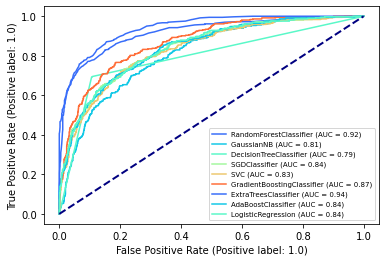

In [50]:
# AUC ROC Curve to compare the multiple models
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

#  Plot  AUC ROC curve for RandomForestClassifier
disp=plot_roc_curve(models[4][1],x_test,y_test)  

# Plot  AUC ROC curve for other models with same axis == RandomForestClassifier
plot_roc_curve(models[0][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[1][1],x_test,y_test,ax=disp.ax_) 
plot_roc_curve(models[2][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[3][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[6][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[5][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[7][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)

plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')

plt.legend(prop={'size':7},loc='lower right')
plt.show()

In [51]:
#Print Prediction for one input using GradientBoostingClassifier model
predict_this = [[1,13.4,13.4,0.6,5.389395,7.632205,13,44.0,13,14,20.0,24.0,22.0,1007.7,1007.1,8.000000,4.503183,0.0]]

if models[4][1].predict(predict_this) == 1:
    print("Rain Forecast for tomorrow is YES.")
else:
    print("NO Rain Forecast  for tomorrow")

NO Rain Forecast  for tomorrow


# Saving the Model --RainForeCast Tomorrow

In [52]:
import pickle
file = 'RainForecastTomm'
Final_mod = models[4][1]
print(Final_mod)
save = pickle.dump(models[4][1],open('RainForecastTomm.pkl','wb'))

RandomForestClassifier()


In [53]:
# Prediction
prediction = Final_mod.predict(x_test)
y_pred=Final_mod.predict(x_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))

Accuracy Score :
 0.8948685857321652


# Conclusion

# Rain ForeCast for tomorrow- Final Model

In [54]:
#---Selected Best Model

pickl_RainForecatTomm = pickle.load(open('RainForecastTomm.pkl','rb'))
subscribed_test=pickl_RainForecatTomm.predict(x_test)
df_raintom = pd.DataFrame(subscribed_test, columns =['RainForecatTomm_predicted'])
print("\nRain Forecat for tomorrow based on Test data provided: ")
display(df_raintom)


Rain Forecat for tomorrow based on Test data provided: 


,RainForecatTomm_predicted
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
1593,0.0
1594,0.0
1595,0.0
1596,0.0


# Build Model --Amount of rainfall 

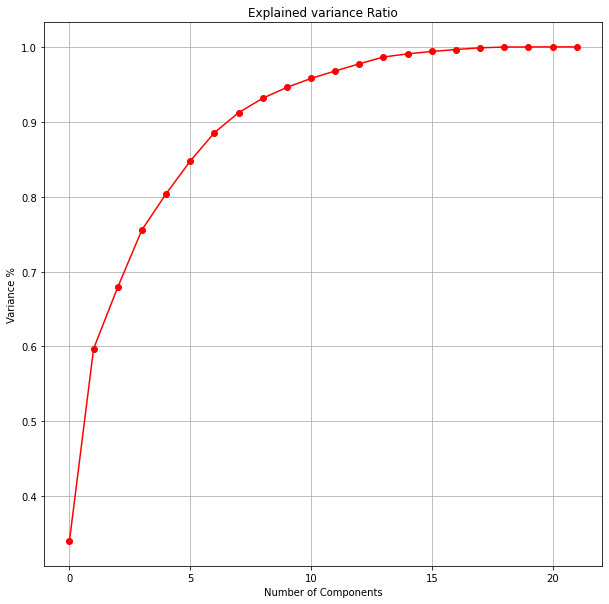

In [55]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(df)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [56]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(df)

In [57]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [58]:
principle_x.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [59]:
features = principle_x
target = df['Rainfall']

In [60]:
features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,31.172144,1.888572,1.085808,-15.176495,0.949525,-15.267591,-4.079195,0.116595,-0.191621,2.565748,6.661146,1.572778,0.944777,3.493075,1.394027
1,25.741289,-6.535624,1.034559,-14.121645,15.443114,-11.907731,2.953146,2.380934,-0.275724,-1.630067,6.381523,1.182226,0.850831,0.442594,0.794760
2,24.569411,5.799752,-0.125908,-12.737912,2.825846,-15.870664,-2.024816,-0.244141,-2.017794,2.239935,6.315750,2.568843,-0.675254,0.142784,-0.586996
3,27.811242,-27.804638,-0.327065,-11.843371,-3.145321,-1.520508,-5.187837,6.254638,4.272558,7.699472,5.434171,-0.501906,3.317397,1.508557,1.158689
4,17.496398,-2.942934,10.419242,-13.956636,4.091247,-4.758811,2.898599,1.686393,0.749443,-2.605468,9.937215,0.043385,6.822915,-0.988488,1.527812


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

lr=LinearRegression() # instance for linearregression

# Find the best random state value where training r2-score = testing r2-score

Random_State=[]
Training_r2_score=[]
Testing_r2_score=[]
Difference=[]

# Get the random state value where training r2-score = testing r2-score

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_r2_score.append(r2_score(y_train,pred_train)*100)
        Testing_r2_score.append(r2_score(y_test,pred_test)*100)
        Difference.append(abs((r2_score(y_test,pred_test)*100)-(r2_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training R2 Score":Training_r2_score,"Testing R2 Score":Testing_r2_score,"Difference in R2 Score":Difference})
print("Table of random state values with training r2_score = testing r2_score")
RS_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Table of random state values with training r2_score = testing r2_score


,Random State,Training R2 Score,Testing R2 Score,Difference in R2 Score
9,9,99.973110,99.973108,0.000002
969,969,99.973111,99.973106,0.000006
729,729,99.973103,99.973097,0.000006
260,260,99.973106,99.973124,0.000018
896,896,99.973100,99.973120,0.000020
...,...,...,...,...
637,637,99.974651,99.964009,0.010642
727,727,99.974761,99.963112,0.011649
655,655,99.974959,99.962502,0.012456
559,559,99.975191,99.961842,0.013349


In [62]:
# best random state where training r2 score equal to testing r2 score
RSN=RS_table["Random State"][RS_table["Difference in R2 Score"]==RS_table["Difference in R2 Score"].min()]
BestRandomState=np.array(RSN)[0]
print("BestRandom State from Linear Regression",BestRandomState)

BestRandom State from Linear Regression 9


In [63]:
# Use the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=BestRandomState)

In [64]:
# Train the model and checkg  metrics with fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("Model : Linear Regression")
print("R2 Score : ",r2_score(y_test,pred_test))
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred_test))
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred_test)))

Model : Linear Regression
R2 Score :  0.9997310821448668
Mean Absolute Error(MAE) :  0.06073401191057858
Mean Squared Error(MSE) :  0.006123987409609213
Root Mean Squared Error(RMSE) :  0.07825590974239079


# Cross Validation for Linear Regression

In [65]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=r2_score(y_test,pred_lr)

# Find the optimized folds from Linear Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,features,target,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation R2 Score":CV_Score,"Model R2 Score":Model_Score,"Difference in R2 Score":Difference})  
print("Cross Validation Details with Folds")
CV_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Cross Validation Details with Folds


,No of Folds,Cross Validation R2 Score,Model R2 Score,Difference in R2 Score
6,8,99.971058,99.973108,0.000021
5,7,99.970821,99.973108,0.000023
7,9,99.970433,99.973108,0.000027
8,10,99.970213,99.973108,0.000029
1,3,99.969900,99.973108,0.000032
4,6,99.969892,99.973108,0.000032
3,5,99.969072,99.973108,0.000040
2,4,99.967362,99.973108,0.000057
0,2,99.960761,99.973108,0.000123


In [66]:
# Get best no. of folds where the least difference between cross validation score & model score
CVF=CV_table["No of Folds"][CV_table["Difference in R2 Score"]==CV_table["Difference in R2 Score"].min()]
BCV=np.array(CVF)[0]
print("Best Cross Validation score is :",BCV)

Best Cross Validation score is : 8


In [67]:
# Use best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,features,target,cv=BCV).mean()
print("The CV r2 score is:",lsscore_selected*100,"\nThe model r2 score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV r2 score is: 99.97105818729449 
The model r2 score is: 99.97310821448669
Difference is: 2.0500271921908286e-05


# Other Regression Algorithms

In [68]:
from sklearn.tree import DecisionTreeRegressor          # DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor       # KNeighborsRegressor
from sklearn.linear_model import SGDRegressor           # Gradient Descent Regressor
from sklearn.svm import SVR                             # Support Vector Regressor
from sklearn.linear_model import Lasso                  # Lasso Regressor
from sklearn.linear_model import Ridge                  # Ridge Regressor
from sklearn.linear_model import ElasticNet             # Elastic Net Regressor
from sklearn.ensemble import RandomForestRegressor      # RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor        # ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor  # GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor          # AdaBoostRegressor
from xgboost import XGBRegressor                        # XGBRegressor

# list of all Algorithms

models=[('DecisionTreeRegressor()',DecisionTreeRegressor()),('KNeighborsRegressor()',KNeighborsRegressor()),
        ('SGDRegressor()',SGDRegressor()),('SVR()',SVR()),('Lasso()',Lasso()),('Ridge()',Ridge()),
        ('ElasticNet()',ElasticNet()),('RandomForestRegressor()',RandomForestRegressor()),
        ('ExtraTreesRegressor()',ExtraTreesRegressor()),('GradientBoostingRegressor()',GradientBoostingRegressor()),
        ('AdaBoostRegressor()',AdaBoostRegressor()),('XGBRegressor()',XGBRegressor())]

#  empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[abs(lss-lsscore_selected)]
MAE=[mean_absolute_error(y_test,pred_lr)]
MSE=[mean_squared_error(y_test,pred_lr)]
RMSE=[np.sqrt(mean_squared_error(y_test,pred_lr))]

# Loop  all algorithms to train the model & check for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(r2_score(y_test,pred_test)*100)        # "R2 Score" to the list 
    MAE.append(mean_absolute_error(y_test,pred_test))         #  "MAE" to the list 
    MSE.append(mean_squared_error(y_test,pred_test))          #  "MSE" to the list 
    RMSE.append(np.sqrt(mean_squared_error(y_test,pred_test)))#  "RMSE" to the list 
    
    score=cross_val_score(model[1],features,target,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                #  "cross validation score" to the list
    Difference.append(abs(r2_score(y_test,pred_test)-score)) # "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    #  "Model" to the list

#e dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model R2 Score':Model_Score,'Cross Validation R2 Score':CV_Score,'Difference in R2 Score':Difference,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
print("DataFrame with all model metrics")
score_table[score_table["Difference in R2 Score"]<100].sort_values(by=["Difference in R2 Score"],ascending=True)  

DataFrame with all model metrics


,Model,Model R2 Score,Cross Validation R2 Score,Difference in R2 Score,MAE,MSE,RMSE
6,Ridge(),99.973109,99.971059,0.000020,0.060734,0.006124,0.078255
0,LinearRegression(),99.973108,99.971058,0.000021,0.060734,0.006124,0.078256
3,SGDRegressor(),99.942438,99.953262,0.000108,0.089233,0.013108,0.114492
12,XGBRegressor(),98.933766,98.878350,0.000554,0.271076,0.242810,0.492758
7,ElasticNet(),99.206184,99.137353,0.000688,0.314508,0.180773,0.425175
5,Lasso(),98.286275,98.177095,0.001092,0.481851,0.390262,0.624709
9,ExtraTreesRegressor(),99.064283,98.641388,0.004229,0.238747,0.213088,0.461615
10,GradientBoostingRegressor(),98.237844,97.783349,0.004545,0.426483,0.401291,0.633475
8,RandomForestRegressor(),98.594522,98.021319,0.005732,0.322246,0.320065,0.565743
11,AdaBoostRegressor(),87.630196,86.711805,0.009184,1.570345,2.816939,1.678374


In [69]:
# Get the best model where the least difference between cross validation score & model score
BMS=score_table["Model"][score_table["Difference in R2 Score"]==score_table["Difference in R2 Score"].min()]
BM=np.array(BMS)[0] 
print("Model Identified is :",BM ) # Ideal Model

Model Identified is : Ridge()


### Observations:

Best model( Ridge Regression) for this dataset because of:

1.highest R^2 score

2.lowest root mean squared error

Out of all algorithms checked, Ridge Regression model is selected for hyper parameter tuning

as the difference between model and cross-validation score is less

# Hyper Parameter Tuning

In [70]:
#Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Defining parameters for Ridge Regression
parameters = {
    'alpha':[0,1.0,1.1],
    'fit_intercept':[True,False],
    'copy_X':[True, False],
    'max_iter':[1000,15000],
    'solver':['auto', 'svd', 'lsqr', 'sparse_cg','sag'],
    'positive':[True, False]
    
    }

GCV=GridSearchCV(Ridge(),parameters,cv=5)  
GCV.fit(x_train,y_train)   #  GridSearchCV to train model with all combination of parameters
GCV.best_params_  

{'alpha': 1.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'solver': 'auto'}

In [71]:
Rdg=Ridge(alpha=GCV.best_params_['alpha'],copy_X=GCV.best_params_['copy_X'],fit_intercept=GCV.best_params_['fit_intercept'],
                   max_iter=GCV.best_params_['max_iter'],solver=GCV.best_params_['solver'],positive=GCV.best_params_['positive'])
Rdg.fit(x_train,y_train)
Rdg.score(x_train,y_train)
pred_decision=Rdg.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print("R2 Score:",rfs*100)

rfscore=cross_val_score(Rdg,features,target,cv=2)
rfc=rfscore.mean()
print("Cross Val Score:",rfc*100)
print("Difference is:",r2_score(y_test,pred_decision)-rfc)

R2 Score: 99.9731085564766
Cross Val Score: 99.96076572311001
Difference is: 0.0001234283336658537


### Observations:

Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is 0.0001

Model with default parameters: The difference between Cross Validation Score and model score is 0.000020

As difference is less in the model with default parameters We will consider the Ridge Regression model with default parameters

In [72]:
#models selected ===RidgeRegression()
x_predict = list(Rdg.predict(x_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(10)

,predicted_values,original_values
233,0.021499,0.0
2526,0.000013,0.0
3173,0.002880,0.0
8119,0.451799,0.4
5298,0.041591,0.0
6624,-0.002076,0.0
417,-0.014952,0.0
2695,0.015912,0.0
3570,4.117774,4.2
5194,7.834415,7.8


# Save Model -RainFall Prediction

In [73]:
#RidgeRegression()
import pickle
Final_mod = models[5][1]
print(Final_mod)
file = 'rainfall_predict'
save = pickle.dump(Rdg,open('rainfall_predict.pkl','wb'))

Ridge()


In [74]:
# Prediction
prediction = Final_mod.predict(x_test)
y_pred=Final_mod.predict(x_test)
print('\033[1m'+'Model Score :'+'\033[0m\n', r2_score(y_test, y_pred))

Model Score :
 0.9997310852594262


# Conclusion

In [75]:
pickled_rainfall_predict = pickle.load(open('rainfall_predict.pkl','rb'))
result=pickled_rainfall_predict.score(x_test,y_test)
print(result)

conclusion=pd.DataFrame([pickled_rainfall_predict.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion.T

0.999731085564766


,Predicted,Original
0,0.021499,0.0
1,0.000013,0.0
2,0.002880,0.0
3,0.451799,0.4
4,0.041591,0.0
...,...,...
1593,0.061714,0.0
1594,-0.015843,0.0
1595,0.016893,0.0
1596,-0.115009,0.0
